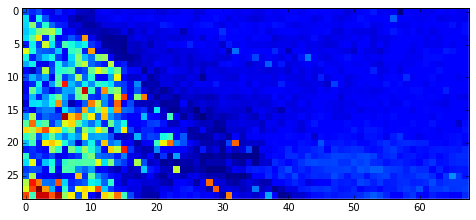

,315nm POM-01 Photometer [nA],400nm POM-01 Photometer [uA],500nm POM-01 Photometer [uA],675nm POM-01 Photometer [uA],870nm POM-01 Photometer [uA],940nm POM-01 Photometer [uA],1020nm POM-01 Photometer [uA],315nm Obsolete AOD,400nm Obsolete AOD,500nm Obsolete AOD,675nm Obsolete AOD,870nm Obsolete AOD,940nm Obsolete AOD,1020nm Obsolete AOD
datetime,,,,,,,,,,,,,,
2014-04-08 18:00:00,-2194.917883,-2179.650583,-2065.379667,-2005.4225,-2060.177167,-2117.088833,-2093.865833,-2216.45358,-2216.194319,-2216.29417,-2216.333306,-2216.345249,-2216.202907,-2216.346496


In [30]:
from datetime import datetime,timedelta, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_helper_functions import *
from IPython.display import display
pd.options.display.max_columns = 999
%matplotlib inline

desired_channel = 'BAND_01'
desired_date = datetime(2014, 4, 8)
desired_timedelta = timedelta(hours = 18)
desired_datetime = desired_date + desired_timedelta
satellite_filefolder = 'data/satellite/colorado/summer6months/data/'
sensor_filefolder = 'data/sensor_data/colorado6months/'
pvoutput_filefolder = 'data/pvoutput/pvoutput6months/'

#satellite data
satellite_filename = find_filename(desired_datetime, desired_channel, satellite_filefolder)
lons, lats, data = return_satellite_data(satellite_filename, satellite_filefolder)

plt.figure(figsize=(8, 8))
imgplot = plt.imshow(data)
imgplot.set_interpolation('none')
plt.show()

#sensor data
sensor_filename = find_file_from_date(desired_date, sensor_filefolder)
df_sensor = return_sensor_data(sensor_filename, sensor_filefolder).ix[:,-15:-1]
df_sensor[df_sensor.index == desired_datetime]
display(df_sensor[df_sensor.index == desired_datetime])

In [31]:
ravel_data = np.ravel(data)
print ravel_data.shape
print data.shape

(1972,)
(29, 68)


In [32]:
unravel_data = ravel_data.reshape((29,68))

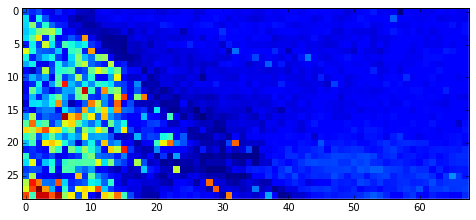

In [33]:
plt.figure(figsize=(8, 8))
imgplot = plt.imshow(unravel_data)
imgplot.set_interpolation('none')
plt.show()

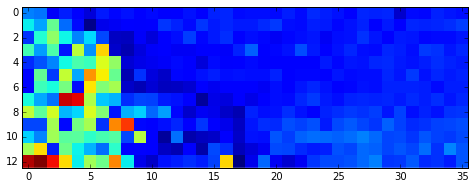

In [65]:
import scipy
data2 = scipy.ndimage.zoom(data, zoom=(0.45, 0.53), order=5)
plt.figure(figsize=(8, 8))
imgplot = plt.imshow(data2)
imgplot.set_interpolation('none')
plt.show()